# Binning 

> ## Library

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

> ## Data

In [4]:
disk = pd.read_csv(r'C:\Users\user\Documents\Data Science\MODUL 3\Scaling\disk.csv')
disk

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1
...,...,...
1524,58,1
1525,64,1
1526,47,0
1527,26,1


> ## EDA

In [7]:
disk['x_interval'] = pd.cut(disk['x'], 7) # equal interval
disk

,x,class,x_interval
0,51,0,"(46.0, 53.0]"
1,19,1,"(17.951, 25.0]"
2,66,1,"(60.0, 67.0]"
3,35,0,"(32.0, 39.0]"
4,64,1,"(60.0, 67.0]"
...,...,...,...
1524,58,1,"(53.0, 60.0]"
1525,64,1,"(60.0, 67.0]"
1526,47,0,"(46.0, 53.0]"
1527,26,1,"(25.0, 32.0]"


In [9]:
pd.crosstab(disk['x_interval'], disk['class'], normalize = 0)

class,0,1
x_interval,,
"(17.951, 25.0]",0.224670,0.775330
"(25.0, 32.0]",0.537037,0.462963
"(32.0, 39.0]",0.835616,0.164384
"(39.0, 46.0]",0.846561,0.153439
"(46.0, 53.0]",0.583673,0.416327
"(53.0, 60.0]",0.302632,0.697368
"(60.0, 67.0]",0.068293,0.931707


<AxesSubplot:xlabel='x_interval'>

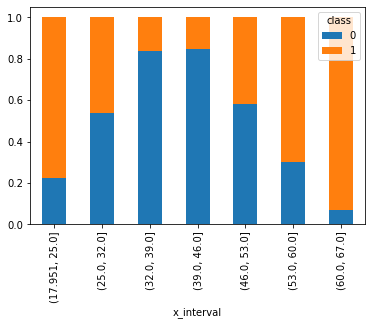

In [10]:
pd.crosstab(disk['x_interval'], disk['class'], normalize = 0).plot(kind = 'bar', stacked = True)

1. Non-linear correlation = quadratic
2. Linear models are less able to capture existing patterns : y = a + bx
3. Solutin: discretization to capture existing pattern between x and y

> ## Model without Binning

In [11]:
x = disk[['x']]
y = disk['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 2020)

In [12]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [13]:
y_pred = logreg.predict(x_test)
accuracy_score(y_test, y_pred)

0.5822454308093995

> ## Model with Binning

In [21]:
discretize = KBinsDiscretizer(n_bins = 7, strategy = 'uniform', encode = 'onehot')
x_train_disc = discretize.fit_transform(x_train)
x_test_disc = discretize.transform(x_test)

In [22]:
logreg = LogisticRegression()
logreg.fit(x_train_disc, y_train)

LogisticRegression()

In [23]:
y_pred = logreg.predict(x_test_disc)
accuracy_score(y_test, y_pred)

0.6997389033942559

Accuracy increased in Model with Binning, because discretization can capture pattern between x and y.     
ex : year old (x) with default rate     
    1. young : high default rate      
    2. ideal : lower default rate      
    3. old : high default rate

<AxesSubplot:xlabel='x_interval'>

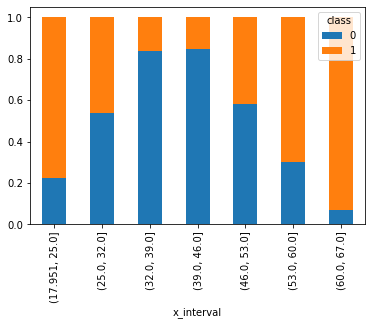

In [24]:
pd.crosstab(disk['x_interval'], disk['class'], normalize = 0).plot(kind = 'bar', stacked = True)

0 = non default rate,
1 = default rate